In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

In [2]:
#Read file
data = pd.read_csv("clean_data.csv")

In [3]:
print(data.shape)
data.head()

(6029, 17)


,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,MW,HeavyAtomMolWt,LogP,MolMR,NumHDonors,NumHAcceptors,NumAtoms,AR,TPSA,RB,bioactivity_class
0,0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,33.0,nM,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,active
1,1,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,314.0,nM,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,inactive
2,2,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,32.0,nM,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,active
3,3,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,388.0,nM,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,inactive
4,4,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...,Ki,4140.0,nM,435.178,416.026,5.1731,107.3846,2.0,3.0,26.0,2.0,43.70,3.0,inactive


In [4]:
#Factorize activity as 0 and 1 and other categories
data['bioactivity_class'], mapping = data['bioactivity_class'].factorize()
data['bioactivity_class']
data['standard_units'], mapping = data['standard_units'].factorize()
data['standard_type'], mapping = data['standard_type'].factorize()

In [5]:
#Split the data to predictor and attributes

X = data.iloc[:,3:15]
y = data.iloc[:,16]


In [6]:
X.head()

,standard_type,standard_value,standard_units,MW,HeavyAtomMolWt,LogP,MolMR,NumHDonors,NumHAcceptors,NumAtoms,AR,TPSA
0,0,33.0,0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54
1,0,314.0,0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54
2,0,32.0,0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84
3,0,388.0,0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84
4,0,4140.0,0,435.178,416.026,5.1731,107.3846,2.0,3.0,26.0,2.0,43.70


In [7]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: bioactivity_class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.96


In [10]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 360   57]
 [   0 1091]]


In [11]:
print("f1 score tree for >50K: {:.2f}".format(f1_score(y_test, pred_tree,average="weighted")))

f1 score tree for >50K: 0.96


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree
                            ))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       417
           1       0.95      1.00      0.97      1091

    accuracy                           0.96      1508
   macro avg       0.98      0.93      0.95      1508
weighted avg       0.96      0.96      0.96      1508



In [13]:
#Build classification model - Iteration 1
tree_clf = DecisionTreeClassifier(min_samples_leaf=4,max_depth=4,random_state=42)
tree_clf.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf.predict(X)))

Accuracy: 0.9998341350140986


In [14]:
#Build classification model - Iteration 2
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf2.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9998341350140986


In [15]:
#Build classification model - Iteration 3
tree_clf3 = DecisionTreeClassifier(min_samples_leaf=1,max_depth=1, random_state=42)
tree_clf3.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9998341350140986


In [16]:
#using cross validation:

tree_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_scores = cross_val_score(tree_clf4, X, y, scoring="accuracy",cv=4)

print("Cross-validation scores: {}".format(tree_scores))

Cross-validation scores: [1.         1.         1.         0.84140677]


In [17]:
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.96


In [18]:
from sklearn.model_selection import cross_validate

tree_res = cross_validate(tree_clf4, X, y, cv=4,
                     return_train_score=True)
tree_res_df = pd.DataFrame(tree_res)
display(tree_res_df)
print("Mean times and scores:\n", tree_res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.013986,0.001088,1.000000,1.000000
1,0.013932,0.000979,1.000000,1.000000
2,0.012404,0.000808,1.000000,0.999779
3,0.004836,0.000694,0.841407,1.000000


Mean times and scores:
 fit_time       0.011290
score_time     0.000892
test_score     0.960352
train_score    0.999945
dtype: float64


In [19]:
tree_clf4.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9998341350140986


In [20]:
#startified cv
from sklearn.model_selection import StratifiedKFold
tree_clf5 = DecisionTreeClassifier(max_depth=2, random_state=42)
skf = StratifiedKFold(n_splits=4)
tree_scores = cross_val_score(tree_clf5, X, y, scoring="accuracy", cv=skf)
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.95


In [21]:
tree_clf5.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf5.predict(X)))

Accuracy: 0.9560457787361089


In [56]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    'max_depth': [2, 3, 5, 7, 9, 11, 13, 15],
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5]}
clf = DecisionTreeClassifier(random_state = 42)
grid_clf = GridSearchCV(clf, param_grid=param_dict, cv=5, verbose=1, n_jobs=-1)
grid_clf.fit(X_train,y_train)

print("Accuary: ", grid_clf.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Accuary:  0.9212558059942306


In [57]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, grid_clf.best_estimator_.predict(X_test)))
print("Best parameters: ", grid_clf.best_params_)

Accuracy: 0.9224137931034483
Best parameters:  {'max_depth': 2, 'min_samples_leaf': 0.1}


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("AUC score:", roc_auc_score(y_test, y_pred_prob[:,1]))

accuracy: 0.9542440318302388
F1 score: 0.9680111265646731
AUC score: 0.9852829010851814


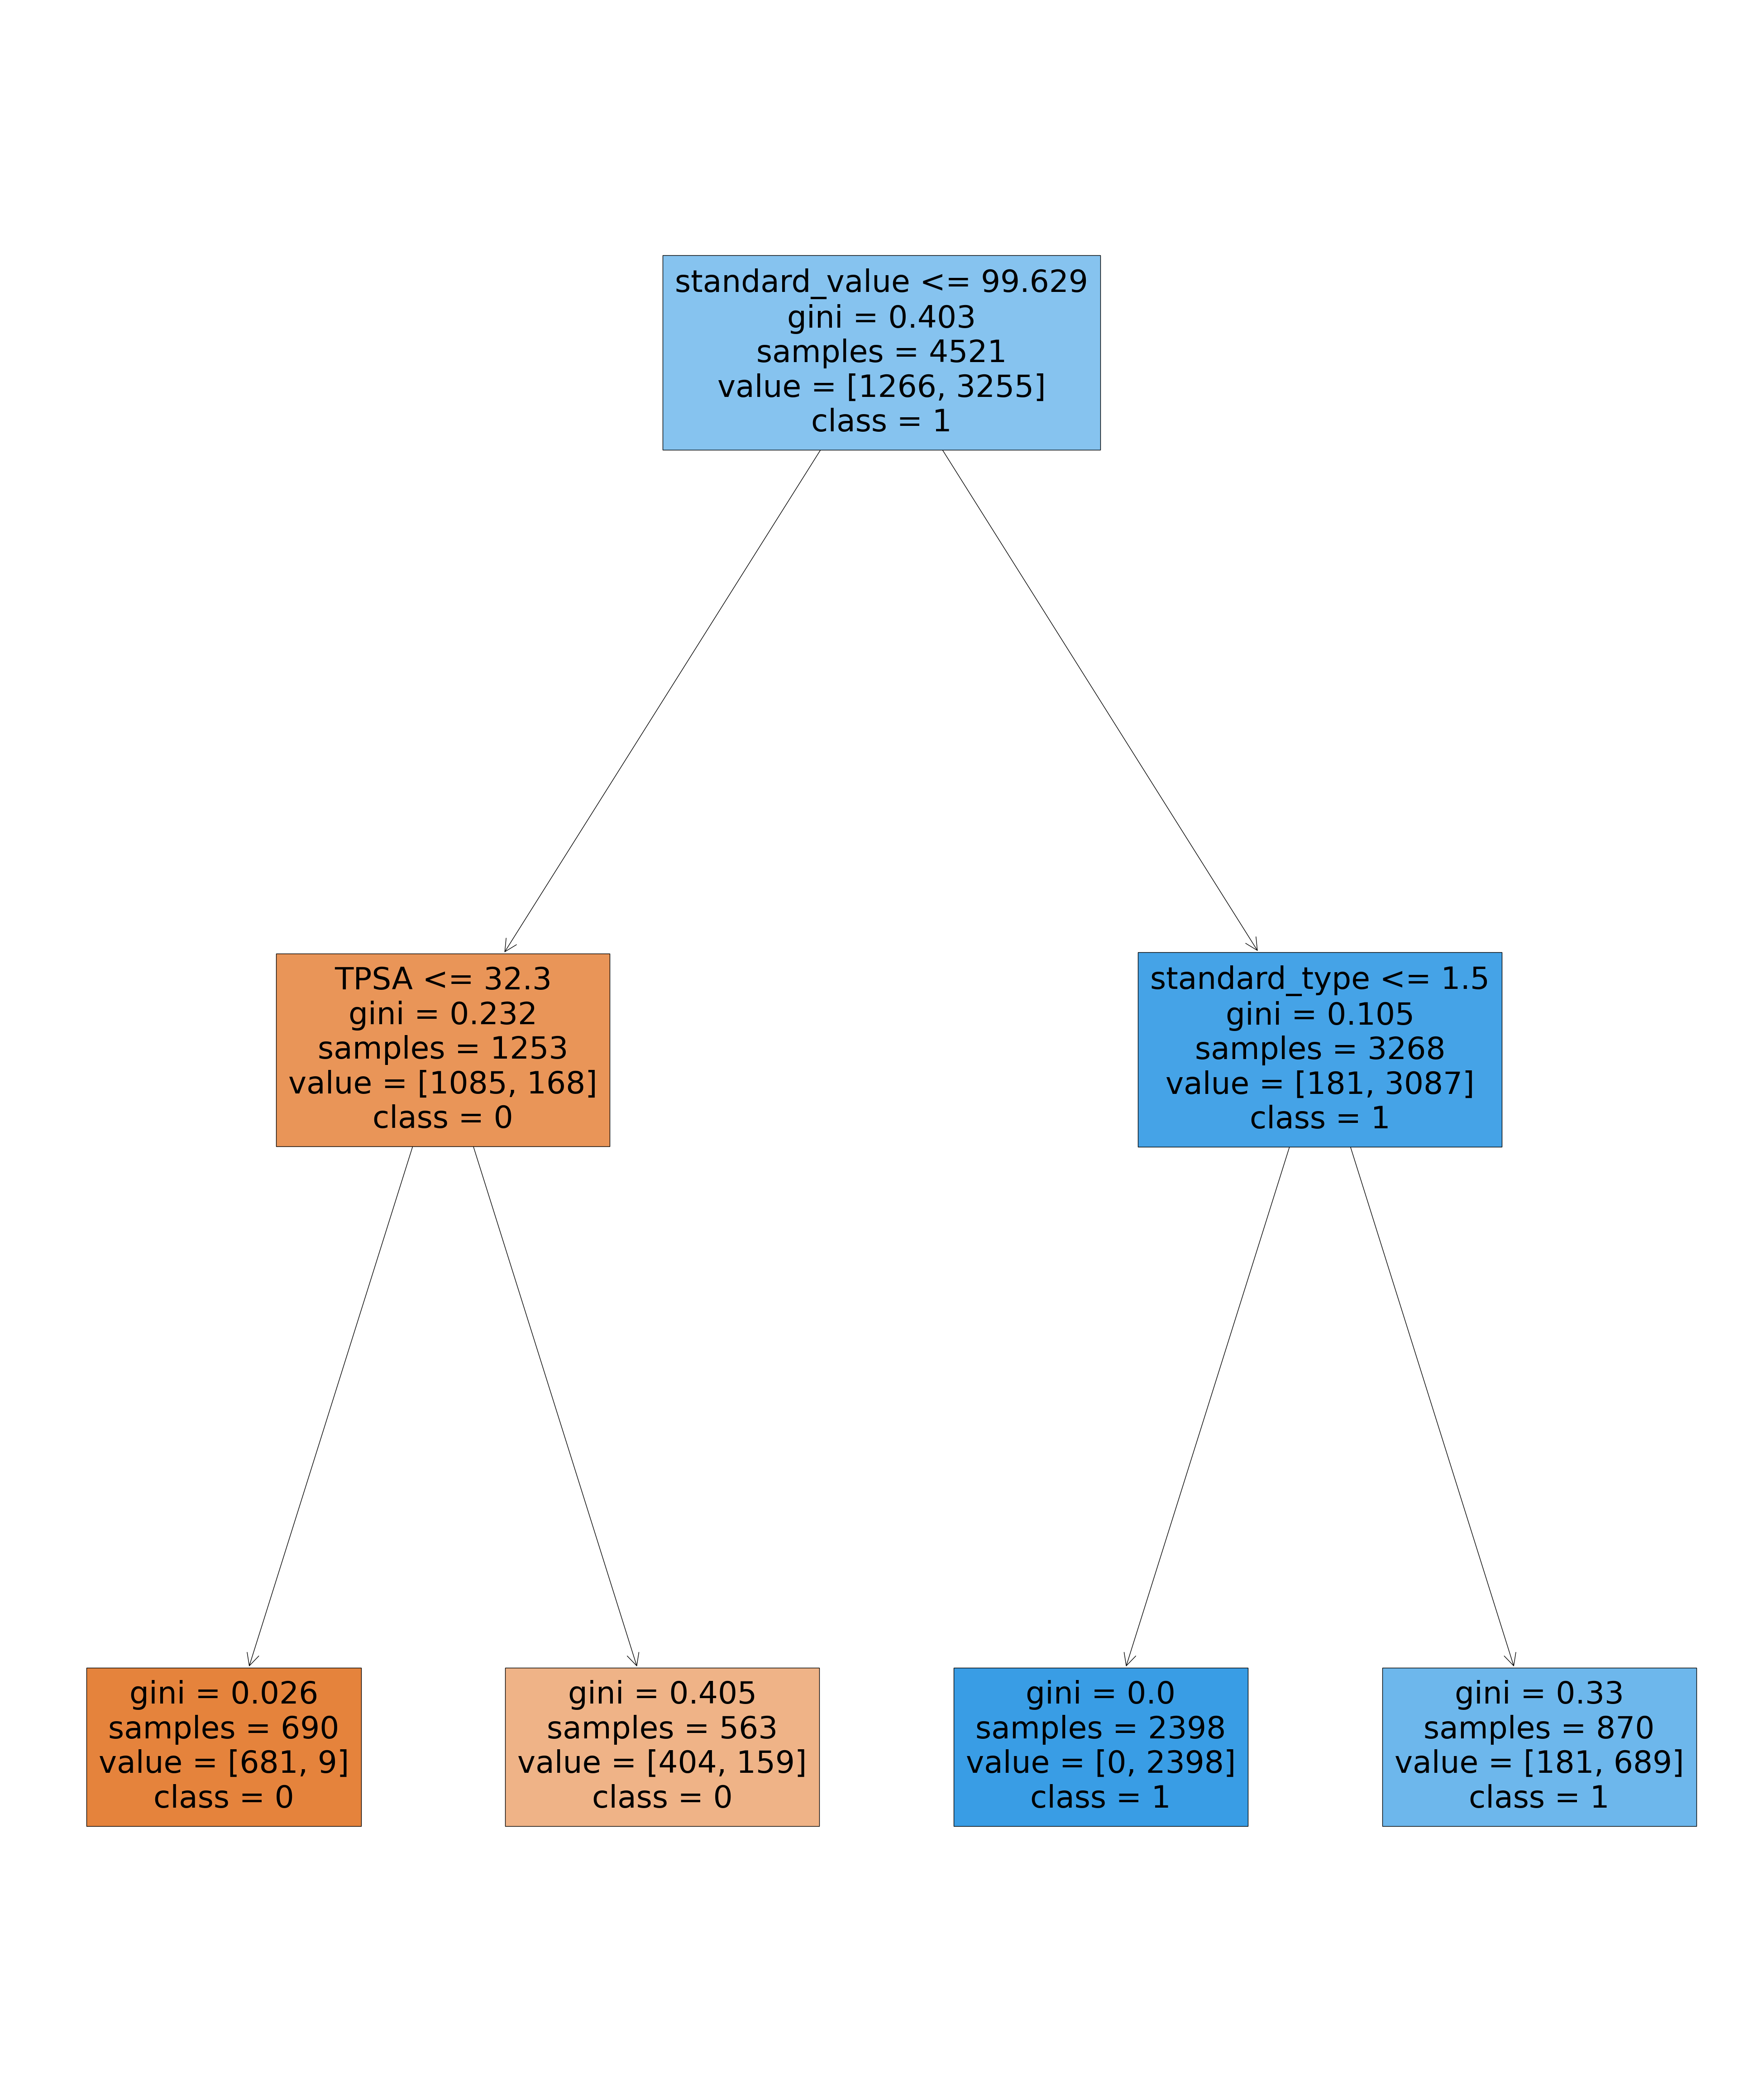

In [24]:
from sklearn import tree
fig = plt.figure(figsize=(50,60))
_ = tree.plot_tree(grid_clf.best_estimator_,
                   feature_names=X_train.columns,
                   class_names=["0","1"],
                   filled=True)

In [ ]:
#nayie Bayes 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train['LogP'] = X_train['LogP'] + 100

In [27]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5,
                          return_train_score=True, scoring="accuracy")

grid_search.fit(X_train, y_train)

print("Accuary: ", grid_search.best_score_)

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Accuary:  0.4328726837138806


In [28]:
grid_search.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

In [30]:
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [31]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print("Accuracy:",metrics.accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)))
print("Best parameters: ", grid_search.best_params_)
print("F1 score:", f1_score(y_train, y_train_pred))

auc = roc_auc_score(y_test, y_test_prob)

print("AUC score:", auc)

Accuracy: 0.4270557029177719
Best parameters:  {'alpha': 0.001}
F1 score: 0.3501393463389917
AUC score: 0.6063244729605866


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree
                            ))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       417
           1       0.95      1.00      0.97      1091

    accuracy                           0.96      1508
   macro avg       0.98      0.93      0.95      1508
weighted avg       0.96      0.96      0.96      1508



In [ ]:
#Knn Neighbours   

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2, 3, 4, 5],
              'metric': ["euclidean", "manhattan", "minkowski"]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=6), param_grid, cv=5,
                          return_train_score=True, scoring='accuracy')

grid_search.fit(X_train, y_train)

Parameter grid:
{'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=6),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy')

In [34]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best cross-validation score: 0.96


In [35]:
optimal_nb_model = KNeighborsClassifier(**grid_search.best_params_)

optimal_nb_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [36]:
y_pred = optimal_nb_model.predict(X_test)
y_pred_prob = optimal_nb_model.predict_proba(X_test)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("AUC score:", roc_auc_score(y_test, y_pred_prob[:,1]))

accuracy: 0.9542440318302388
F1 score: 0.9680111265646731
AUC score: 0.9852829010851814


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree
                            ))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       417
           1       0.95      1.00      0.97      1091

    accuracy                           0.96      1508
   macro avg       0.98      0.93      0.95      1508
weighted avg       0.96      0.96      0.96      1508



In [39]:
#SVM
# MinMaxScaler X_train, X_test, y_train, y_test
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [40]:
# transform
x_train = mms.transform(X_train)
x_test = mms.transform(X_test)

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train) 
svc_pre = svc.predict(x_test)
print('Accuracy: ',np.mean(svc_pre == y_test))

Accuracy:  0.7234748010610079


In [42]:
skf = StratifiedKFold(n_splits=5)
tree_scores = cross_val_score(SVC(), X, y, scoring="accuracy", cv=skf)
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.72


In [45]:
print("accuracy:", accuracy_score(y_test, svc_pre))
print("F1 score:", f1_score(y_test, svc_pre))
print("AUC score:", roc_auc_score(y_test, svc_pre))

accuracy: 0.7234748010610079
F1 score: 0.8395536744901885
AUC score: 0.5


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_pre
                            ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       417
           1       0.72      1.00      0.84      1091

    accuracy                           0.72      1508
   macro avg       0.36      0.50      0.42      1508
weighted avg       0.52      0.72      0.61      1508



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [47]:
# rf
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

In [48]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
rfc_pre = rfc.predict(x_test)

In [51]:
print('Accuracy: ',np.mean(rfc_pre == y_test))

Accuracy:  0.7281167108753316


In [52]:
skf = StratifiedKFold(n_splits=5)
tree_scores = cross_val_score(RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None), X, y, scoring="accuracy", cv=skf)
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.96


In [53]:
print("accuracy:", accuracy_score(y_test, rfc_pre))
print("F1 score:", f1_score(y_test, rfc_pre))
print("AUC score:", roc_auc_score(y_test, rfc_pre))

accuracy: 0.7281167108753316
F1 score: 0.8412083656080558
AUC score: 0.5120970134982756


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pre
                            ))

              precision    recall  f1-score   support

           0       0.71      0.03      0.06       417
           1       0.73      1.00      0.84      1091

    accuracy                           0.73      1508
   macro avg       0.72      0.51      0.45      1508
weighted avg       0.72      0.73      0.62      1508

